# general stats

In [1]:

# region wise analysis imports
import folium
from folium.plugins import MarkerCluster

# sklearn imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

# topic analysis imports and word cloud imports
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
import gensim.corpora as corpora
import re
import numpy as np
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from wordcloud import WordCloud

# sns plots

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# network visualization

from itertools import combinations
import networkx as nx
from nxviz import CircosPlot

# imports for survey analyses

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import datetime

import pytz

import ast

# detailed summaries

import sweetviz as sv

/home/mrinalmanu/miniconda3/envs/lda/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
pdx = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/t_hr.csv", low_memory=False)
hr_df = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/t_hr.csv", low_memory=False)
hr_df

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
0,0,100,RU,1,,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
1,1,100,RU,1,,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
2,2,100,RU,1,,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
3,3,100,RU,1,,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
4,4,4,RU,1,,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
...,...,...,...,...,...,...,...,...,...,...
222367,1912,37,ES-ES,8,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222368,1913,12,ES-ES,8,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222369,1914,19,ES-ES,8,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222370,1915,37,ES-ES,8,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No


In [3]:
new_df = hr_df
new_df

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
0,0,100,RU,1,,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
1,1,100,RU,1,,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
2,2,100,RU,1,,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
3,3,100,RU,1,,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
4,4,4,RU,1,,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
...,...,...,...,...,...,...,...,...,...,...
222367,1912,37,ES-ES,8,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222368,1913,12,ES-ES,8,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222369,1914,19,ES-ES,8,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222370,1915,37,ES-ES,8,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No


In [4]:
new_df = new_df.groupby(["id", "UserLanguage", "Collection"])["Progress"].mean().reset_index()

# progress distribution
cnt_srs = new_df['Progress'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        #color = cnt_srs.values,
        showscale=True
    ),
)


layout = go.Layout(
    title='Progress distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)

fig.add_vline(x=new_df['Progress'].mean(), opacity=.5, annotation_text="Mean {}".format(new_df['Progress'].mean().round(2)))
fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

py.iplot(fig)


In [5]:
new_df

,id,UserLanguage,Collection,Progress
0,0,RU,1,100.0
1,1,RU,1,100.0
2,2,RU,1,100.0
3,3,RU,1,100.0
4,4,RU,1,4.0
...,...,...,...,...
1912,1912,ES-ES,8,37.0
1913,1913,ES-ES,8,12.0
1914,1914,ES-ES,8,19.0
1915,1915,ES-ES,8,37.0


In [6]:
new_df = new_df.groupby(["Collection"])["Progress"].mean().reset_index()

import plotly.express as px


# progress distribution
#cnt_srs = new_df['Progress'].value_counts()

fig =  px.bar(new_df, x="Collection", y="Progress")



fig.add_hline(y=new_df['Progress'].mean(), opacity=.5, annotation_text="Mean {}".format(new_df['Progress'].mean().round(2)))

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_layout(title='Mean progress by collection')

py.iplot(fig)

# rug plot goes here





In [7]:
new_df = hr_df

In [8]:
from plotly.subplots import make_subplots

hist_data = new_df.groupby(["UserLanguage"])["Progress"].mean().reset_index()

nhist_data = new_df.groupby(["Collection"])["Progress"].mean().reset_index()


fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

fig.add_trace(go.Box(
    x=hist_data["Progress"], 
    marker_symbol='line-ns-open', 
    marker_color='blue',
    boxpoints='all',
    jitter=0,
    fillcolor='rgba(255,255,255,0)',
    line_color='rgba(255,255,255,0)',
    hoveron='points',
    name='Grouped by Language'
))


fig.add_trace(go.Box(
    x=nhist_data["Progress"], 
    marker_symbol='line-ns-open', 
    marker_color='red',
    boxpoints='all',
    jitter=0,
    fillcolor='rgba(255,255,255,0)',
    line_color='rgba(255,255,255,0)',
    hoveron='points',
    name='Grouped by Collection'
))

fig.add_vline(x=hist_data["Progress"].mean().round(2), line_color='blue', opacity=.5, annotation_text="Mean {}".format(hist_data['Progress'].mean().round(2)), annotation_position="bottom right")
fig.add_vline(x=nhist_data["Progress"].mean().round(2), line_color='red', opacity=.5, annotation_text="Mean {}".format(nhist_data['Progress'].mean().round(2)), annotation_position="top right")


py.iplot(fig)

# statistics continued...

In [9]:
pdx['UserLanguage'].replace('RU','Russian',inplace=True)
pdx['UserLanguage'].replace('ES-ES','Spanish',inplace=True)
pdx['UserLanguage'].replace('EN','English',inplace=True)

temp_series = pdx['UserLanguage'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Language profile'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [10]:
# collection profile

temp_series = pdx['Collection'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Collection profile'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# groupings non composite

In [11]:
#filter all empty strings from values
hr_df["value"] = hr_df["value"].map(str)
filter = hr_df["value"] != ' '
ndf = hr_df[filter]
ndf

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
29,29,100,RU,1,5,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
45,45,25,RU,1,8,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
64,64,100,RU,1,5,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
566,566,100,RU,2,8,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
585,585,85,EN,2,3,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
...,...,...,...,...,...,...,...,...,...,...
222356,1901,100,ES-ES,8,4,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222358,1903,85,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222360,1905,100,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222361,1906,100,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No


In [12]:
filter = hr_df["Composite"] != 'Yes'
ndf = ndf[filter]
ndf

/tmp/ipykernel_30917/414337130.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
3834,0,100,RU,1,1,LE3.003,What information can be obtained from your gen...,Ancestry,1,No
3837,3,100,RU,1,1,LE3.003,What information can be obtained from your gen...,Ancestry,1,No
3839,5,100,RU,1,1,LE3.003,What information can be obtained from your gen...,Ancestry,1,No
3840,6,100,ES-ES,1,1,LE3.003,What information can be obtained from your gen...,Ancestry,1,No
3841,7,100,ES-ES,1,1,LE3.003,What information can be obtained from your gen...,Ancestry,1,No
...,...,...,...,...,...,...,...,...,...,...
222356,1901,100,ES-ES,8,4,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222358,1903,85,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222360,1905,100,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222361,1906,100,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No


In [13]:
#ndf['Option'] = ndf['Option'].replace("""'""", " ")

ndf.columns
ndf

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
3834,0,100,RU,1,1,LE3.003,What information can be obtained from your gen...,Ancestry,1,No
3837,3,100,RU,1,1,LE3.003,What information can be obtained from your gen...,Ancestry,1,No
3839,5,100,RU,1,1,LE3.003,What information can be obtained from your gen...,Ancestry,1,No
3840,6,100,ES-ES,1,1,LE3.003,What information can be obtained from your gen...,Ancestry,1,No
3841,7,100,ES-ES,1,1,LE3.003,What information can be obtained from your gen...,Ancestry,1,No
...,...,...,...,...,...,...,...,...,...,...
222356,1901,100,ES-ES,8,4,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222358,1903,85,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222360,1905,100,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222361,1906,100,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No


In [14]:

cdf = ndf.groupby(["Group", "Description", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()


In [15]:
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series


In [16]:
nx

,level_0,level_1,0
0,0,0,"'Ancestry','Ancestry','Ancestry','Ancestry','A..."
1,1,0,"'Health','Health','Health','Health','Health','..."
2,2,0,'Potential to succeed in different domains aka...
3,3,0,'Personal traits aka for example extroversion'...
4,4,0,"'I do not know','I do not know','I do not know..."
...,...,...,...
94,94,0,"'Requirement to pay compensation','Requirement..."
95,95,0,"'Imprisonment','Imprisonment','Imprisonment','..."
96,96,0,"'Other','Other','Other','Other','Other','Other..."
97,97,0,"'None','None','None','None','None','None','Non..."


In [17]:
cdf['rating'] = nx.iloc[:,2]


In [18]:
wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 4]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

In [19]:
vc = pd.DataFrame(wo)

In [20]:
vc

,Ancestry,Health,Potential to succeed in different domains aka for example sports,Personal traits aka for example extroversion,I do not know,Other,Other as Text,Right to security including privacy,Right to health and medical care,Equal access to education,Right to work,Right to private property,Right to a fair trial,Right to move freely choose a place of stay or residence,Right to marriage,I do,The State,Commercial organisations,Medical facilities,Research organisations,Do not know,Disease prevention and cure,Improving fairness in criminal trials,Economic growth,New medical technologies,Changing the structure of society,New agricultural methods and products,Reducing food scarcity,Designer babies,Reduction in population variation,Developing biological weapons,Selection and enhancement of military personnel,Targeted commercial advertising,Targeted political campaigns,Crime prevention,Increased Longevity,Altering own traits aka biohacking,Personalised education,Streamed or stratified education,Testing for hiring in employment,Ensuring national security,Scientific and technological progress,Commercial benefit,Healthcare development,Should not be done,Do no know,Tests,Storage,Analysis,Sharing,Transferring across borders,None of the above,Disciplinary,Administrative aka dismissal,Financial,Fine aka financial penalty,None,Dissemination of genetic knowledge to the general public,Policymaking: Contributing to working groups concerning the regulation of genetic data,Revising and updating ethical guidelines concerning genetic research and use of genetic data,Fine,Requirement to pay compensation,Imprisonment
0,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,851.0,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,759.0
96,NaN,NaN,NaN,NaN,NaN,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [21]:
ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']
ndfx


,Group,Description,Variable,rating,Ancestry,Health,Potential to succeed in different domains aka for example sports,Personal traits aka for example extroversion,I do not know,Other,Other as Text,Right to security including privacy,Right to health and medical care,Equal access to education,Right to work,Right to private property,Right to a fair trial,Right to move freely choose a place of stay or residence,Right to marriage,I do,The State,Commercial organisations,Medical facilities,Research organisations,Do not know,Disease prevention and cure,Improving fairness in criminal trials,Economic growth,New medical technologies,Changing the structure of society,New agricultural methods and products,Reducing food scarcity,Designer babies,Reduction in population variation,Developing biological weapons,Selection and enhancement of military personnel,Targeted commercial advertising,Targeted political campaigns,Crime prevention,Increased Longevity,Altering own traits aka biohacking,Personalised education,Streamed or stratified education,Testing for hiring in employment,Ensuring national security,Scientific and technological progress,Commercial benefit,Healthcare development,Should not be done,Do no know,Tests,Storage,Analysis,Sharing,Transferring across borders,None of the above,Disciplinary,Administrative aka dismissal,Financial,Fine aka financial penalty,None,Dissemination of genetic knowledge to the general public,Policymaking: Contributing to working groups concerning the regulation of genetic data,Revising and updating ethical guidelines concerning genetic research and use of genetic data,Fine,Requirement to pay compensation,Imprisonment
0,1,What information can be obtained from your gen...,LE3.003,"'Ancestry','Ancestry','Ancestry','Ancestry','A...",205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,What information can be obtained from your gen...,LE3.004,"'Health','Health','Health','Health','Health','...",NaN,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,What information can be obtained from your gen...,LE3.005,'Potential to succeed in different domains aka...,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,What information can be obtained from your gen...,LE3.006,'Personal traits aka for example extroversion'...,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,What information can be obtained from your gen...,LE3.007,"'I do not know','I do not know','I do not know...",NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,21,What should the liability be for genetic data ...,LE3.134,"'Requirement to pay compensation','Requirement...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [22]:
hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/human_rights.tsv", sep='\t', low_memory=False)
hr

del hr["Description"]
del hr["Group"]
del hr["Composite"]

In [23]:
t_hr = pd.merge(ndfx, hr, on='Variable')
del t_hr["rating"]
t_hr.columns

Index(['Group', 'Description', 'Variable', 'Ancestry', 'Health',
       'Potential to succeed in different domains aka for example sports',
       'Personal traits aka for example extroversion', 'I do not know',
       'Other', 'Other as Text', 'Right to security including privacy',
       'Right to health and medical care', 'Equal access to education',
       'Right to work', 'Right to private property', 'Right to a fair trial',
       'Right to move freely choose a place of stay or residence',
       'Right to marriage', 'I do', 'The State', 'Commercial organisations',
       'Medical facilities', 'Research organisations', 'Do not know',
       'Disease prevention and cure', 'Improving fairness in criminal trials',
       'Economic growth', 'New medical technologies',
       'Changing the structure of society',
       'New agricultural methods and products', 'Reducing food scarcity',
       'Designer babies', 'Reduction in population variation',
       'Developing biological weapons'

In [24]:
len(t_hr.columns) # so selection would be from columns 2 to 66 because last column is option value

67

In [25]:
del t_hr["Variable"]
del t_hr["Option"]

lex = t_hr.set_index(['Group','Description']).stack().reset_index()
# rename columns 2 and 3
lex["Option"] = lex['level_2']
lex["Count"] = lex[0]

del lex['level_2']
del lex[0]

In [26]:
lex

,Group,Description,Option,Count
0,1,What information can be obtained from your gen...,Ancestry,205.0
1,1,What information can be obtained from your gen...,Health,218.0
2,1,What information can be obtained from your gen...,Potential to succeed in different domains aka ...,86.0
3,1,What information can be obtained from your gen...,Personal traits aka for example extroversion,62.0
4,1,What information can be obtained from your gen...,I do not know,15.0
...,...,...,...,...
94,21,What should the liability be for genetic data ...,Requirement to pay compensation,851.0
95,21,What should the liability be for genetic data ...,Imprisonment,759.0
96,21,What should the liability be for genetic data ...,Other,131.0
97,21,What should the liability be for genetic data ...,None,20.0


In [27]:
x = lex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()
xf['Description'].unique()

array(['What information can be obtained from your genetic material?',
       'How relevant is genetic information to the following personal rights? ',
       'Who do you think owns your genetic material and or or genetic data?',
       'Please indicate whether the following endeavours have positive negative or no impact on society',
       'Genetic science can contribute to the following social changes. Indicate whether you consider these endeavours positive neutral or negative for society ',
       'Populationaswide compulsory genetic testing should be done for the following purposes aka Several options can be chosen',
       'What aspects of the use of genetic data should be regulated by law aka Several options can be chosen?',
       'What internal regulation does your workplace employ for misuses of genetic data by employees aka Several options can be chosen',
       'In your country of residence genetic data breaches are regulated through aka Several options can be chosen',
     

In [28]:
fig = px.bar(xf, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()

# grouping composite

## loading dataset

In [29]:
#filter all empty strings from values
hr_df["value"] = hr_df["value"].map(str)
filter = hr_df["value"] != ' '
ndf = hr_df[filter]
ndf

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
29,29,100,RU,1,5,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
45,45,25,RU,1,8,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
64,64,100,RU,1,5,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
566,566,100,RU,2,8,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
585,585,85,EN,2,3,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
...,...,...,...,...,...,...,...,...,...,...
222356,1901,100,ES-ES,8,4,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222358,1903,85,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222360,1905,100,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
222361,1906,100,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No


In [30]:
filter = hr_df["Composite"] != 'No'
ndf = ndf[filter]
ndf

/tmp/ipykernel_30917/381769245.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
29,29,100,RU,1,5,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
45,45,25,RU,1,8,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
64,64,100,RU,1,5,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
566,566,100,RU,2,8,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
585,585,85,EN,2,3,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
...,...,...,...,...,...,...,...,...,...,...
162929,1901,100,ES-ES,8,3,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
162931,1903,85,ES-ES,8,2,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
162933,1905,100,ES-ES,8,3,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
162934,1906,100,ES-ES,8,3,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes


## item 20

In [31]:
ndf['Group'].unique()

array([20,  2,  4,  5,  7, 10, 11, 12, 14, 15])

In [32]:
filter = ndf["Group"] == 20
ndf_20 = ndf[filter]
ndf_20

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
29,29,100,RU,1,5,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
45,45,25,RU,1,8,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
64,64,100,RU,1,5,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
566,566,100,RU,2,8,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
585,585,85,EN,2,3,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
732,732,100,RU,2,5,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
1088,1088,99,RU,2,5,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
1962,45,25,RU,1,Биоинформатика,LE2.067,Indicate the area of genetics you primarily wo...,Other as Text,20,Yes
2483,566,100,RU,2,Онкогенетика,LE2.067,Indicate the area of genetics you primarily wo...,Other as Text,20,Yes


In [33]:
ndf_20['Option'].unique()

array(['General Research aka 1 Agronomist aka 2 Counselling aka 3 Law aka 4 Medical aka 5 Behavioural aka 6 Educational aka 7 Other aka 8',
       'Other as Text'], dtype=object)

In [34]:
ndf_20['value'].replace('1','General Research',inplace=True)
ndf_20['value'].replace('2','Agronomist',inplace=True)
ndf_20['value'].replace('3','Counselling',inplace=True)
ndf_20['value'].replace('4','Law',inplace=True)
ndf_20['value'].replace('5','Medical',inplace=True)
ndf_20['value'].replace('6','Behavioural',inplace=True)
ndf_20['value'].replace('7','Educational',inplace=True)
ndf_20['value'].replace('8','Other',inplace=True)

ndf_20


,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
29,29,100,RU,1,Medical,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
45,45,25,RU,1,Other,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
64,64,100,RU,1,Medical,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
566,566,100,RU,2,Other,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
585,585,85,EN,2,Counselling,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
732,732,100,RU,2,Medical,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
1088,1088,99,RU,2,Medical,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
1962,45,25,RU,1,Биоинформатика,LE2.067,Indicate the area of genetics you primarily wo...,Other as Text,20,Yes
2483,566,100,RU,2,Онкогенетика,LE2.067,Indicate the area of genetics you primarily wo...,Other as Text,20,Yes


## item 2

In [35]:
filter = ndf["Group"] == 2
ndf_2 = ndf[filter]
ndf_2

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
17253,0,100,RU,1,1,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17254,1,100,RU,1,1,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17256,3,100,RU,1,1,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17258,5,100,RU,1,3,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17259,6,100,ES-ES,1,1,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
...,...,...,...,...,...,...,...,...,...,...
17583,330,25,ES-ES,1,1,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17585,332,73,ES-ES,1,1,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17586,333,73,ES-ES,1,1,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17588,335,38,ES-ES,1,1,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes


In [36]:
ndf_2['Option'].unique()

array(['Yes no dontknow'], dtype=object)

In [37]:
ndf_2['value'].replace('1','Yes',inplace=True)
ndf_2['value'].replace('2','No',inplace=True)
ndf_2['value'].replace('3','Do not know',inplace=True)

ndf_2

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
17253,0,100,RU,1,Yes,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17254,1,100,RU,1,Yes,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17256,3,100,RU,1,Yes,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17258,5,100,RU,1,Do not know,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17259,6,100,ES-ES,1,Yes,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
...,...,...,...,...,...,...,...,...,...,...
17583,330,25,ES-ES,1,Yes,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17585,332,73,ES-ES,1,Yes,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17586,333,73,ES-ES,1,Yes,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes
17588,335,38,ES-ES,1,Yes,LE3.025,Can using genetic information affect human rig...,Yes no dontknow,2,Yes


## item 4

In [38]:
filter = ndf["Group"] == 4
ndf_4 = ndf[filter]
ndf_4

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
34506,0,100,RU,1,1,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34507,1,100,RU,1,1,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34509,3,100,RU,1,1,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34511,5,100,RU,1,2,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34512,6,100,ES-ES,1,1,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
...,...,...,...,...,...,...,...,...,...,...
34833,327,62,ES-ES,1,2,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34838,332,73,ES-ES,1,2,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34839,333,73,ES-ES,1,3,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34841,335,38,ES-ES,1,1,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes


In [39]:
ndf_4['value'].replace('1','Yes',inplace=True)
ndf_4['value'].replace('2','No',inplace=True)
ndf_4['value'].replace('3','Do not know',inplace=True)

ndf_4

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
34506,0,100,RU,1,Yes,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34507,1,100,RU,1,Yes,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34509,3,100,RU,1,Yes,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34511,5,100,RU,1,No,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34512,6,100,ES-ES,1,Yes,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
...,...,...,...,...,...,...,...,...,...,...
34833,327,62,ES-ES,1,No,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34838,332,73,ES-ES,1,No,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34839,333,73,ES-ES,1,Do not know,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes
34841,335,38,ES-ES,1,Yes,LE3.034,Do you think you own your genetic material?,Yes no dontknow,4,Yes


## item 5

In [40]:
filter = ndf["Group"] == 5
ndf_5 = ndf[filter]
ndf_5

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
36423,0,100,RU,1,1,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36424,1,100,RU,1,1,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36426,3,100,RU,1,1,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36428,5,100,RU,1,1,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36429,6,100,ES-ES,1,1,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
...,...,...,...,...,...,...,...,...,...,...
36750,327,62,ES-ES,1,2,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36755,332,73,ES-ES,1,1,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36756,333,73,ES-ES,1,3,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36758,335,38,ES-ES,1,1,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes


In [41]:
ndf_5['value'].replace('1','Yes',inplace=True)
ndf_5['value'].replace('2','No',inplace=True)
ndf_5['value'].replace('3','Do not know',inplace=True)

ndf_5

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
36423,0,100,RU,1,Yes,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36424,1,100,RU,1,Yes,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36426,3,100,RU,1,Yes,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36428,5,100,RU,1,Yes,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36429,6,100,ES-ES,1,Yes,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
...,...,...,...,...,...,...,...,...,...,...
36750,327,62,ES-ES,1,No,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36755,332,73,ES-ES,1,Yes,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36756,333,73,ES-ES,1,Do not know,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes
36758,335,38,ES-ES,1,Yes,LE3.035,Do you think you own the data extracted from y...,Yes no dontknow,5,Yes


## item 7

In [42]:
filter = ndf["Group"] == 7
ndf_7 = ndf[filter]
ndf_7

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
53676,0,100,RU,1,3,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
53677,1,100,RU,1,2,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
53679,3,100,RU,1,1,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
53681,5,100,RU,1,1,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
53682,6,100,ES-ES,1,1,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
...,...,...,...,...,...,...,...,...,...,...
55586,1910,37,ES-ES,8,1,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
55587,1911,62,ES-ES,8,1,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
55588,1912,37,ES-ES,8,1,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
55591,1915,37,ES-ES,8,1,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes


In [43]:
ndf_7['value'].replace('1','Yes',inplace=True)
ndf_7['value'].replace('2','No',inplace=True)
ndf_7['value'].replace('3','Do not know',inplace=True)

ndf_7

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
53676,0,100,RU,1,Do not know,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
53677,1,100,RU,1,No,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
53679,3,100,RU,1,Yes,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
53681,5,100,RU,1,Yes,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
53682,6,100,ES-ES,1,Yes,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
...,...,...,...,...,...,...,...,...,...,...
55586,1910,37,ES-ES,8,Yes,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
55587,1911,62,ES-ES,8,Yes,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
55588,1912,37,ES-ES,8,Yes,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes
55591,1915,37,ES-ES,8,Yes,LE3.044,Do you think people should have the right to d...,Yes no dontknow,7,Yes


## item 10

In [44]:
filter = ndf["Group"] == 10
ndf_10 = ndf[filter]
ndf_10

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
136107,0,100,RU,1,4,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
136108,1,100,RU,1,5,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
136110,3,100,RU,1,1,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
136112,5,100,RU,1,3,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
136113,6,100,ES-ES,1,4,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
...,...,...,...,...,...,...,...,...,...,...
138008,1901,100,ES-ES,8,4,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
138010,1903,85,ES-ES,8,4,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
138012,1905,100,ES-ES,8,4,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
138013,1906,100,ES-ES,8,4,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes


In [45]:
ndf_10['Option'].unique()

array(['Increases the risk of discrimination aka 1 Reduces the risk of discrimination aka 2 Makes no difference to the risk of discrimination aka 3 Both increases and decreases the risk of discrimination depending on how genetics data are regulated aka 4 Do not know aka 5'],
      dtype=object)

In [46]:
ndf_10['value'].replace('1','Increases the risk of discrimination',inplace=True)
ndf_10['value'].replace('2','Reduces the risk of discrimination',inplace=True)
ndf_10['value'].replace('3','Makes no difference to the risk of discrimination',inplace=True)
ndf_10['value'].replace('4','Both increases and decreases the risk of discrimination depending on how genetics data are regulated',inplace=True)
ndf_10['value'].replace('5','Do not know',inplace=True)


ndf_10

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
136107,0,100,RU,1,Both increases and decreases the risk of discr...,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
136108,1,100,RU,1,Do not know,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
136110,3,100,RU,1,Increases the risk of discrimination,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
136112,5,100,RU,1,Makes no difference to the risk of discrimination,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
136113,6,100,ES-ES,1,Both increases and decreases the risk of discr...,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
...,...,...,...,...,...,...,...,...,...,...
138008,1901,100,ES-ES,8,Both increases and decreases the risk of discr...,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
138010,1903,85,ES-ES,8,Both increases and decreases the risk of discr...,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
138012,1905,100,ES-ES,8,Both increases and decreases the risk of discr...,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes
138013,1906,100,ES-ES,8,Both increases and decreases the risk of discr...,LE3.089,In your opinion the current use of genetic data,Increases the risk of discrimination aka 1 Red...,10,Yes


## item 11

In [47]:
filter = ndf["Group"] == 11
ndf_11 = ndf[filter]
ndf_11

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
138024,0,100,RU,1,1,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
138025,1,100,RU,1,4,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
138027,3,100,RU,1,1,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
138029,5,100,RU,1,1,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
138030,6,100,ES-ES,1,1,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
...,...,...,...,...,...,...,...,...,...,...
139925,1901,100,ES-ES,8,4,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
139927,1903,85,ES-ES,8,3,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
139929,1905,100,ES-ES,8,3,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
139930,1906,100,ES-ES,8,1,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes


In [48]:
ndf_11['Option'].unique()

array(['Benefits outweigh the risks. aka 1 Risk outweighs the benefits. aka 2 Risks and benefits balance eachasother out. aka 3 Do not know aka 4'],
      dtype=object)

In [49]:
ndf_11['value'].replace('1','Benefits outweigh the risks',inplace=True)
ndf_11['value'].replace('2','Risk outweighs the benefits',inplace=True)
ndf_11['value'].replace('3','Risks and benefits balance each-other out',inplace=True)
ndf_11['value'].replace('4','Do not know',inplace=True)

ndf_11

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
138024,0,100,RU,1,Benefits outweigh the risks,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
138025,1,100,RU,1,Do not know,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
138027,3,100,RU,1,Benefits outweigh the risks,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
138029,5,100,RU,1,Benefits outweigh the risks,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
138030,6,100,ES-ES,1,Benefits outweigh the risks,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
...,...,...,...,...,...,...,...,...,...,...
139925,1901,100,ES-ES,8,Do not know,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
139927,1903,85,ES-ES,8,Risks and benefits balance each-other out,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
139929,1905,100,ES-ES,8,Risks and benefits balance each-other out,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes
139930,1906,100,ES-ES,8,Benefits outweigh the risks,LE3.090,What is the relationship between the benefits ...,Benefits outweigh the risks. aka 1 Risk outwei...,11,Yes


## item 12

In [50]:
filter = ndf["Group"] == 12
ndf_12 = ndf[filter]
ndf_12

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
139941,0,100,RU,1,2,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
139942,1,100,RU,1,1,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
139944,3,100,RU,1,2,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
139946,5,100,RU,1,2,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
139947,6,100,ES-ES,1,1,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
...,...,...,...,...,...,...,...,...,...,...
141842,1901,100,ES-ES,8,2,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
141844,1903,85,ES-ES,8,1,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
141846,1905,100,ES-ES,8,3,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
141847,1906,100,ES-ES,8,3,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes


In [51]:
ndf_12['Option'].unique()

array(['Obtaining someone s genetic material must be: Always voluntary aka 1LE3.091 Compulsory but under certain circumstances aka 2 Do not know aka 3'],
      dtype=object)

In [52]:
ndf_12['value'].replace('1','Always voluntary',inplace=True)
ndf_12['value'].replace('2','LE3.091 Compulsory but under certain circumstances',inplace=True)
ndf_12['value'].replace('3','Do not know',inplace=True)

ndf_12

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
139941,0,100,RU,1,LE3.091 Compulsory but under certain circumsta...,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
139942,1,100,RU,1,Always voluntary,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
139944,3,100,RU,1,LE3.091 Compulsory but under certain circumsta...,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
139946,5,100,RU,1,LE3.091 Compulsory but under certain circumsta...,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
139947,6,100,ES-ES,1,Always voluntary,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
...,...,...,...,...,...,...,...,...,...,...
141842,1901,100,ES-ES,8,LE3.091 Compulsory but under certain circumsta...,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
141844,1903,85,ES-ES,8,Always voluntary,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
141846,1905,100,ES-ES,8,Do not know,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes
141847,1906,100,ES-ES,8,Do not know,LE3.091,Obtaining someone s genetic material must be,Obtaining someone s genetic material must be: ...,12,Yes


## item 14

In [53]:
filter = ndf["Group"] == 14
ndf_14 = ndf[filter]
ndf_14

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
159111,0,100,RU,1,2,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
159112,1,100,RU,1,2,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
159114,3,100,RU,1,4,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
159116,5,100,RU,1,1,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
159117,6,100,ES-ES,1,2,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
...,...,...,...,...,...,...,...,...,...,...
161012,1901,100,ES-ES,8,2,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
161014,1903,85,ES-ES,8,2,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
161016,1905,100,ES-ES,8,4,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
161017,1906,100,ES-ES,8,1,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes


In [54]:
ndf_14['Option'].unique()

array(['yes no na dontknow'], dtype=object)

In [55]:
ndf_14['value'].replace('1','Yes',inplace=True)
ndf_14['value'].replace('2','No',inplace=True)
ndf_14['value'].replace('3','Not applicable',inplace=True)
ndf_14['value'].replace('4','Do not know',inplace=True)

ndf_14

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
159111,0,100,RU,1,No,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
159112,1,100,RU,1,No,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
159114,3,100,RU,1,Do not know,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
159116,5,100,RU,1,Yes,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
159117,6,100,ES-ES,1,No,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
...,...,...,...,...,...,...,...,...,...,...
161012,1901,100,ES-ES,8,No,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
161014,1903,85,ES-ES,8,No,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
161016,1905,100,ES-ES,8,Do not know,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes
161017,1906,100,ES-ES,8,Yes,LE3.109,Is there an ethics committee in the organisati...,yes no na dontknow,14,Yes


## item 15

In [56]:
filter = ndf["Group"] == 15
ndf_15 = ndf[filter]
ndf_15

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
161028,0,100,RU,1,3,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
161029,1,100,RU,1,3,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
161031,3,100,RU,1,3,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
161033,5,100,RU,1,2,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
161034,6,100,ES-ES,1,3,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
...,...,...,...,...,...,...,...,...,...,...
162929,1901,100,ES-ES,8,3,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
162931,1903,85,ES-ES,8,2,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
162933,1905,100,ES-ES,8,3,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
162934,1906,100,ES-ES,8,3,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes


In [57]:
ndf_15['Option'].unique()

array(['suff insuff dontknow'], dtype=object)

In [58]:
ndf_15['value'].replace('1','Sufficient',inplace=True)
ndf_15['value'].replace('2','Insufficient',inplace=True)
ndf_15['value'].replace('3','Do not know',inplace=True)

ndf_15

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
161028,0,100,RU,1,Do not know,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
161029,1,100,RU,1,Do not know,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
161031,3,100,RU,1,Do not know,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
161033,5,100,RU,1,Insufficient,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
161034,6,100,ES-ES,1,Do not know,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
...,...,...,...,...,...,...,...,...,...,...
162929,1901,100,ES-ES,8,Do not know,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
162931,1903,85,ES-ES,8,Insufficient,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
162933,1905,100,ES-ES,8,Do not know,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
162934,1906,100,ES-ES,8,Do not know,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes


# all together

## creating large df

In [59]:
mndf = pd.concat([ndf_20, ndf_2, ndf_4, ndf_5, ndf_7, ndf_10, ndf_11, ndf_12, ndf_14, ndf_15]).reset_index()

In [60]:
mndf

,index,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
0,29,29,100,RU,1,Medical,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
1,45,45,25,RU,1,Other,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
2,64,64,100,RU,1,Medical,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
3,566,566,100,RU,2,Other,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
4,585,585,85,EN,2,Counselling,LE2.066,Indicate the area of genetics you primarily wo...,General Research aka 1 Agronomist aka 2 Counse...,20,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9333,162929,1901,100,ES-ES,8,Do not know,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
9334,162931,1903,85,ES-ES,8,Insufficient,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
9335,162933,1905,100,ES-ES,8,Do not know,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes
9336,162934,1906,100,ES-ES,8,Do not know,LE3.110,Current legal and ethical regulation of geneti...,suff insuff dontknow,15,Yes


In [61]:
#filter all empty strings from values
mndf["value"] = mndf["value"].map(str)
mndf['value'].replace(' ', np.nan, inplace=True)
mndf= mndf.dropna(subset=['value'])

In [62]:
mndf['Option'] = mndf["value"] # assign option to value

In [63]:
filter = hr_df["Composite"] == 'No'
nndf = hr_df[filter]
nndf['value'].replace(' ', np.nan, inplace=True)
nndf= nndf.dropna(subset=['value'])

In [64]:
large_df = pd.concat([mndf, nndf]).reset_index()
large_df

,level_0,index,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
0,0,29.0,29,100,RU,1,Medical,LE2.066,Indicate the area of genetics you primarily wo...,Medical,20,Yes
1,1,45.0,45,25,RU,1,Other,LE2.066,Indicate the area of genetics you primarily wo...,Other,20,Yes
2,2,64.0,64,100,RU,1,Medical,LE2.066,Indicate the area of genetics you primarily wo...,Medical,20,Yes
3,3,566.0,566,100,RU,2,Other,LE2.066,Indicate the area of genetics you primarily wo...,Other,20,Yes
4,4,585.0,585,85,EN,2,Counselling,LE2.066,Indicate the area of genetics you primarily wo...,Counselling,20,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
47376,222356,NaN,1901,100,ES-ES,8,4,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
47377,222358,NaN,1903,85,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
47378,222360,NaN,1905,100,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
47379,222361,NaN,1906,100,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No


In [65]:
# these variables are missing
list(set(hr_df['Variable'].unique()) - set(large_df['Variable'].unique()))


['LE3.132', 'LE3.128', 'LE3.127', 'LE3.123', 'LE3.131', 'LE3.124']

## complete plot (proportionalised)

In [66]:

cdf = large_df.groupby(["Group", "Description", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()


nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series


cdf['rating'] = nx.iloc[:,2]


wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 4]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)



ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']
ndfx


hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/human_rights.tsv", sep='\t', low_memory=False)
hr

del hr["Description"]
del hr["Group"]
del hr["Composite"]

t_hr = pd.merge(ndfx, hr, on='Variable')
del t_hr["rating"]

del t_hr["Variable"]
del t_hr["Option"]

lex = t_hr.set_index(['Group','Description']).stack().reset_index()
# rename columns 2 and 3
lex["Option"] = lex['level_2']
lex["Count"] = lex[0]

del lex['level_2']
del lex[0]


x = lex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()
xf


,Group,Description,Option,Count
0,1,What information can be obtained from your gen...,Ancestry,0.34
1,1,What information can be obtained from your gen...,Health,0.36
2,1,What information can be obtained from your gen...,I do not know,0.02
3,1,What information can be obtained from your gen...,Other,0.02
4,1,What information can be obtained from your gen...,Other as Text,0.01
...,...,...,...,...
130,21,What should the liability be for genetic data ...,Fine,0.23
131,21,What should the liability be for genetic data ...,Imprisonment,0.31
132,21,What should the liability be for genetic data ...,None,0.01
133,21,What should the liability be for genetic data ...,Other,0.05


In [67]:

fig = px.bar(xf, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()


## complete plot (unproportionalised)

In [68]:
xn = pd.DataFrame(lex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)).reset_index()
xn

,Group,Description,Option,Count
0,1,What information can be obtained from your gen...,Ancestry,205.0
1,1,What information can be obtained from your gen...,Health,218.0
2,1,What information can be obtained from your gen...,I do not know,15.0
3,1,What information can be obtained from your gen...,Other,13.0
4,1,What information can be obtained from your gen...,Other as Text,8.0
...,...,...,...,...
130,21,What should the liability be for genetic data ...,Fine,579.0
131,21,What should the liability be for genetic data ...,Imprisonment,759.0
132,21,What should the liability be for genetic data ...,None,20.0
133,21,What should the liability be for genetic data ...,Other,131.0


In [69]:

fig = px.bar(xn, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()


In [70]:
# without item 9

xn = xn[xn['Group']!=9]

In [71]:
xn

,Group,Description,Option,Count
0,1,What information can be obtained from your gen...,Ancestry,205.0
1,1,What information can be obtained from your gen...,Health,218.0
2,1,What information can be obtained from your gen...,I do not know,15.0
3,1,What information can be obtained from your gen...,Other,13.0
4,1,What information can be obtained from your gen...,Other as Text,8.0
...,...,...,...,...
130,21,What should the liability be for genetic data ...,Fine,579.0
131,21,What should the liability be for genetic data ...,Imprisonment,759.0
132,21,What should the liability be for genetic data ...,None,20.0
133,21,What should the liability be for genetic data ...,Other,131.0


In [72]:

fig = px.bar(xn, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()


## all grouped by language group

In [73]:

cdf = large_df.groupby(["Group", "Description", "UserLanguage", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()



In [74]:
cdf

,Group,Description,UserLanguage,Variable,Option
0,1,What information can be obtained from your gen...,EN,LE3.003,"Ancestry','Ancestry','Ancestry','Ancestry','An..."
1,1,What information can be obtained from your gen...,EN,LE3.004,"Health','Health','Health','Health','Health','H..."
2,1,What information can be obtained from your gen...,EN,LE3.005,Potential to succeed in different domains aka ...
3,1,What information can be obtained from your gen...,EN,LE3.006,"Personal traits aka for example extroversion',..."
4,1,What information can be obtained from your gen...,EN,LE3.008,"Other','Other','Other"
...,...,...,...,...,...
298,21,What should the liability be for genetic data ...,RU,LE3.134,"Requirement to pay compensation','Requirement ..."
299,21,What should the liability be for genetic data ...,RU,LE3.135,"Imprisonment','Imprisonment','Imprisonment','I..."
300,21,What should the liability be for genetic data ...,RU,LE3.136,"Other','Other','Other','Other','Other','Other'..."
301,21,What should the liability be for genetic data ...,RU,LE3.137,"None','None','None','None','None','None','None..."


In [75]:
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series

cdf['rating'] = nx.iloc[:,2]


In [76]:
# the column in iloc changed to 5 because of userlanguage column addition
wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 5]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    

In [77]:

vc = pd.DataFrame(wo)



In [78]:

ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']


In [79]:
hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/human_rights.tsv", sep='\t', low_memory=False)
hr

del hr["Description"]
del hr["Group"]
del hr["Composite"]

t_hr = pd.merge(ndfx, hr, on='Variable')
del t_hr["rating"]

del t_hr["Variable"]
del t_hr["Option"]

In [80]:
lex = t_hr.set_index(['Group','Description', 'UserLanguage']).stack().reset_index()
lex

,Group,Description,UserLanguage,level_3,0
0,1,What information can be obtained from your gen...,EN,Ancestry,23.0
1,1,What information can be obtained from your gen...,ES-ES,Ancestry,86.0
2,1,What information can be obtained from your gen...,RU,Ancestry,96.0
3,1,What information can be obtained from your gen...,EN,Health,24.0
4,1,What information can be obtained from your gen...,ES-ES,Health,96.0
...,...,...,...,...,...
365,21,What should the liability be for genetic data ...,RU,Other,106.0
366,21,What should the liability be for genetic data ...,EN,Do not know,26.0
367,21,What should the liability be for genetic data ...,ES-ES,Do not know,4.0
368,21,What should the liability be for genetic data ...,RU,Do not know,103.0


In [81]:

# rename columns 3 and 4 to new names
lex["Option"] = lex['level_3']
lex["Count"] = lex[0]

del lex['level_3']
del lex[0]
lex

,Group,Description,UserLanguage,Option,Count
0,1,What information can be obtained from your gen...,EN,Ancestry,23.0
1,1,What information can be obtained from your gen...,ES-ES,Ancestry,86.0
2,1,What information can be obtained from your gen...,RU,Ancestry,96.0
3,1,What information can be obtained from your gen...,EN,Health,24.0
4,1,What information can be obtained from your gen...,ES-ES,Health,96.0
...,...,...,...,...,...
365,21,What should the liability be for genetic data ...,RU,Other,106.0
366,21,What should the liability be for genetic data ...,EN,Do not know,26.0
367,21,What should the liability be for genetic data ...,ES-ES,Do not know,4.0
368,21,What should the liability be for genetic data ...,RU,Do not know,103.0


In [82]:

x = lex.groupby(['Group','Description','UserLanguage','Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()
xf

,Group,Description,UserLanguage,Option,Count
0,1,What information can be obtained from your gen...,EN,Ancestry,0.04
1,1,What information can be obtained from your gen...,EN,Health,0.04
2,1,What information can be obtained from your gen...,EN,Other,0.00
3,1,What information can be obtained from your gen...,EN,Other as Text,0.00
4,1,What information can be obtained from your gen...,EN,Personal traits aka for example extroversion,0.02
...,...,...,...,...,...
365,21,What should the liability be for genetic data ...,RU,Fine,0.18
366,21,What should the liability be for genetic data ...,RU,Imprisonment,0.23
367,21,What should the liability be for genetic data ...,RU,None,0.01
368,21,What should the liability be for genetic data ...,RU,Other,0.04


In [83]:
xn = pd.DataFrame(lex.groupby(['Group','Description','UserLanguage','Option'])['Count'].mean().round(2)).reset_index()
xn

,Group,Description,UserLanguage,Option,Count
0,1,What information can be obtained from your gen...,EN,Ancestry,23.0
1,1,What information can be obtained from your gen...,EN,Health,24.0
2,1,What information can be obtained from your gen...,EN,Other,3.0
3,1,What information can be obtained from your gen...,EN,Other as Text,1.0
4,1,What information can be obtained from your gen...,EN,Personal traits aka for example extroversion,12.0
...,...,...,...,...,...
365,21,What should the liability be for genetic data ...,RU,Fine,439.0
366,21,What should the liability be for genetic data ...,RU,Imprisonment,572.0
367,21,What should the liability be for genetic data ...,RU,None,20.0
368,21,What should the liability be for genetic data ...,RU,Other,106.0


### proportionalised faceted by language group

In [84]:

fig = px.bar(xf, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True,
             facet_col='UserLanguage',
             facet_col_wrap=1
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

# this line unmatches the y axis 
fig.update_yaxes(matches=None)


fig.show()


#### unproportionalised faceted by language group

In [85]:


fig = px.bar(xn, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True,
             facet_col='UserLanguage',
             facet_col_wrap=1
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)


# this line unmatches the y axis 
fig.update_yaxes(matches=None)


fig.show()


In [86]:
# without 9th item

xn = xn[xn['Group']!=9]

In [87]:


fig = px.bar(xn, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True,
             facet_col='UserLanguage',
             facet_col_wrap=1
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)


# this line unmatches the y axis 
fig.update_yaxes(matches=None)


fig.show()


# mca

In [88]:
selected_columns = lex[['UserLanguage','Option', 'Count']]
nlex = selected_columns.copy()

In [89]:
#filter for counts greater than 10
nlex["Count"] = nlex["Count"].map(int)
filter = nlex["Count"] >= 10
ndlex = nlex[filter]
ndlex

,UserLanguage,Option,Count
0,EN,Ancestry,23
1,ES-ES,Ancestry,86
2,RU,Ancestry,96
3,EN,Health,24
4,ES-ES,Health,96
...,...,...,...
364,ES-ES,Other,10
365,RU,Other,106
366,EN,Do not know,26
368,RU,Do not know,103


In [90]:
import prince
mca = prince.MCA(random_state=42)
mca.fit(ndlex.iloc[:,1:2])

MCA(random_state=42)

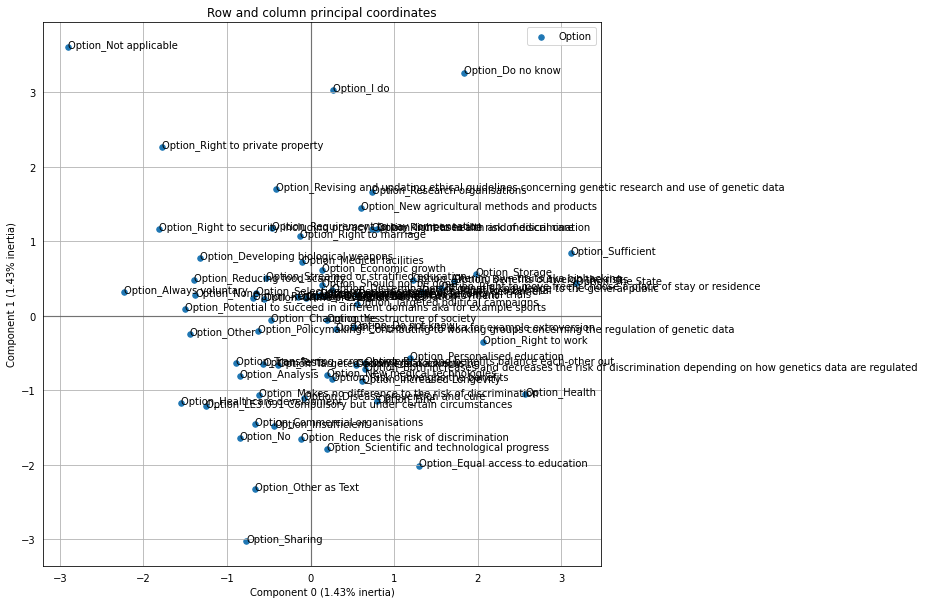

In [91]:
mca.plot_coordinates(ndlex.iloc[:,1:2],
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

### modelling

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
import imutils
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold

In [93]:
xdf = large_df
xdf.columns

Index(['level_0', 'index', 'id', 'Progress', 'UserLanguage', 'Collection',
       'value', 'Variable', 'Description', 'Option', 'Group', 'Composite'],
      dtype='object')

In [94]:
xdf

,level_0,index,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
0,0,29.0,29,100,RU,1,Medical,LE2.066,Indicate the area of genetics you primarily wo...,Medical,20,Yes
1,1,45.0,45,25,RU,1,Other,LE2.066,Indicate the area of genetics you primarily wo...,Other,20,Yes
2,2,64.0,64,100,RU,1,Medical,LE2.066,Indicate the area of genetics you primarily wo...,Medical,20,Yes
3,3,566.0,566,100,RU,2,Other,LE2.066,Indicate the area of genetics you primarily wo...,Other,20,Yes
4,4,585.0,585,85,EN,2,Counselling,LE2.066,Indicate the area of genetics you primarily wo...,Counselling,20,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
47376,222356,NaN,1901,100,ES-ES,8,4,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
47377,222358,NaN,1903,85,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
47378,222360,NaN,1905,100,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No
47379,222361,NaN,1906,100,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No


In [95]:
selected = ["LE3.009","LE3.026","LE3.034","LE3.035","LE3.036","LE3.044","LE3.089","LE3.090","LE3.091","LE3.110","LE3.199","LE3.133"]

In [96]:
mini_df = xdf[xdf['Variable'].isin(selected)]

In [97]:


del xdf['level_0']
del xdf['index']
del xdf['Progress']


In [98]:
mini_df

,level_0,index,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
244,244,34506.0,0,100,RU,1,Yes,LE3.034,Do you think you own your genetic material?,Yes,4,Yes
245,245,34507.0,1,100,RU,1,Yes,LE3.034,Do you think you own your genetic material?,Yes,4,Yes
246,246,34509.0,3,100,RU,1,Yes,LE3.034,Do you think you own your genetic material?,Yes,4,Yes
247,247,34511.0,5,100,RU,1,No,LE3.034,Do you think you own your genetic material?,No,4,Yes
248,248,34512.0,6,100,ES-ES,1,Yes,LE3.034,Do you think you own your genetic material?,Yes,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
44839,218522,NaN,1901,100,ES-ES,8,5,LE3.199,Genetics experts must actively contribute to,Dissemination of genetic knowledge to the gene...,19,No
44840,218524,NaN,1903,85,ES-ES,8,5,LE3.199,Genetics experts must actively contribute to,Dissemination of genetic knowledge to the gene...,19,No
44841,218526,NaN,1905,100,ES-ES,8,5,LE3.199,Genetics experts must actively contribute to,Dissemination of genetic knowledge to the gene...,19,No
44842,218527,NaN,1906,100,ES-ES,8,5,LE3.199,Genetics experts must actively contribute to,Dissemination of genetic knowledge to the gene...,19,No


In [99]:
values = mini_df["Option"] # that which will predict, features/ predictors
target = mini_df["UserLanguage"]# that which is predicted

In [100]:
# Merge the target and values into one dataset
df = pd.concat([values, target], axis=1)

In [101]:
# View all categorical features
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10976 entries, 244 to 44843
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Option        10976 non-null  object
 1   UserLanguage  10976 non-null  object
dtypes: object(2)
memory usage: 257.2+ KB


In [102]:
# One Hot Encoding with get_dummy variables and drop first
dum_df = pd.get_dummies(df["Option"], drop_first=True)

In [103]:
del df["Option"]

In [104]:
df = pd.concat([dum_df, target], axis=1)

In [105]:
# Three classes of independent target variable
y = df.UserLanguage

In [106]:
# Drop target and set the dependent values variables 
X = df.drop('UserLanguage', axis=1)


In [107]:
import sklearn
# Split into training and test sets 30/70 split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=123)

In [108]:

# Logistic model
log_clf = sklearn.linear_model.LogisticRegression(random_state=123, multi_class='multinomial', solver='newton-cg')
log_model = log_clf.fit(X_train, y_train)
log_training_preds = log_clf.predict(X_train)
log_training_accuracy = accuracy_score(y_train, log_training_preds)
log_val_preds = log_clf.predict(X_test) # y_hat
log_val_accuracy = accuracy_score(y_test, log_val_preds)

In [109]:

#Confusion matrix for Logistic Regression
log_matrix = confusion_matrix(y_test, log_val_preds)
print('Confusion Matrix:\n', log_matrix)

Confusion Matrix:
 [[   0    0  311]
 [   0    0  400]
 [   0    0 2582]]


In [110]:
mini_df.columns

Index(['level_0', 'index', 'id', 'Progress', 'UserLanguage', 'Collection',
       'value', 'Variable', 'Description', 'Option', 'Group', 'Composite'],
      dtype='object')

THIS APPROACH WAS NOT WORKING

In [111]:


##### another approach

In [112]:
m_df = xn # grouped by description, userlanguage, option, and count

In [113]:
m_df

,Group,Description,UserLanguage,Option,Count
0,1,What information can be obtained from your gen...,EN,Ancestry,23.0
1,1,What information can be obtained from your gen...,EN,Health,24.0
2,1,What information can be obtained from your gen...,EN,Other,3.0
3,1,What information can be obtained from your gen...,EN,Other as Text,1.0
4,1,What information can be obtained from your gen...,EN,Personal traits aka for example extroversion,12.0
...,...,...,...,...,...
365,21,What should the liability be for genetic data ...,RU,Fine,439.0
366,21,What should the liability be for genetic data ...,RU,Imprisonment,572.0
367,21,What should the liability be for genetic data ...,RU,None,20.0
368,21,What should the liability be for genetic data ...,RU,Other,106.0


In [114]:
X = m_df[['Group', 'Count']]   # that which will predict, features/ predictors
y = m_df["UserLanguage"]# that which is predicted

In [115]:
import sklearn
# Split into training and test sets 30/70 split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=123)

In [116]:
model1 = sklearn.linear_model.LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

In [117]:
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [118]:
#Print model parameters
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

Intercept: 
 [ 0.11813194  0.09400759 -0.21213954]
Coefficients: 
 [[ 0.03915813 -0.01186237]
 [-0.00172459  0.00100401]
 [-0.03743354  0.01085836]]


In [119]:
#Calculate odds ratio estimates
import numpy as np
np.exp(model1.coef_)

array([[1.03993492, 0.98820771],
       [0.99827689, 1.00100452],
       [0.96325843, 1.01091752]])

In [120]:
import statsmodels.api as sm

/home/mrinalmanu/miniconda3/envs/lda/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [121]:
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 0.964406
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:           UserLanguage   No. Observations:                  214
Model:                        MNLogit   Df Residuals:                      208
Method:                           MLE   Df Model:                            4
Date:                Tue, 22 Feb 2022   Pseudo R-squ.:                  0.1188
Time:                        20:43:49   Log-Likelihood:                -206.38
converged:                       True   LL-Null:                       -234.19
Covariance Type:            nonrobust   LLR p-value:                 2.407e-11
UserLanguage=ES-ES       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0241      0.395     -0.061      0.951      -0.799       0.751
Group

In [122]:
#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

array([[21,  9,  4],
       [11,  6, 13],
       [ 7,  7, 15]])

In [123]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))
confmtrx

array([[21,  9,  4],
       [11,  6, 13],
       [ 7,  7, 15]])

In [124]:
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column

pd.DataFrame(confmtrx, index=['RU','ES-ES', 'EN'],
columns=['predicted_RU', 'predicted_ES-ES', 'predicted_EN'])


,predicted_RU,predicted_ES-ES,predicted_EN
RU,21,9,4
ES-ES,11,6,13
EN,7,7,15


In [125]:
#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)


Accuracy Score: 0.45161290322580644
              precision    recall  f1-score   support

          EN       0.54      0.62      0.58        34
       ES-ES       0.27      0.20      0.23        30
          RU       0.47      0.52      0.49        29

    accuracy                           0.45        93
   macro avg       0.43      0.44      0.43        93
weighted avg       0.43      0.45      0.44        93



>0.0000 0.523 (0.081)
>0.0001 0.533 (0.080)
>0.0010 0.524 (0.086)
>0.0100 0.523 (0.081)
>0.1000 0.523 (0.081)
>1.0000 0.523 (0.081)


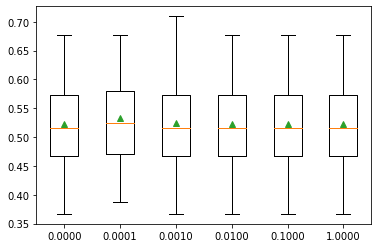

In [126]:
# evaluating multiple models

from statistics import mean
from statistics import stdev as std
import matplotlib.pyplot as pyplot

# get a list of models to evaluate
def get_models():
    models = dict()
    for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
        # create name for model
        key = '%.4f' % p
        # turn off penalty in some cases
        if p == 0.0:
            # no penalty in this case
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
        else:
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model and collect the scores
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show();


Optimal value is 0.0010

In [127]:
summary = pd.DataFrame(zip(X.columns, np.transpose(model1.coef_.tolist()[0])), 
                       columns=['features', 'coef'])

In [128]:
summary

,features,coef
0,Group,0.039158
1,Count,-0.011862


### Is pca possible?

Coming back to large df. I am substituting each option value according to the a code. And then apply int.


In [129]:
len(large_df["Option"].unique())

81

I need 81 values to substitute.

In [130]:
itemx = large_df["Option"].unique()
repx = list(range(1,82))
repx = [str(i) for i in repx] # convert all elements to string 

In [131]:
print(len(itemx))
print(len(repx))

81
81


In [132]:
jdf = large_df # large df to jdf

In [133]:
{str(i1): str(i2) for i1, i2 in zip(itemx, repx)}

{'Medical': '1',
 'Other': '2',
 'Counselling': '3',
 'Биоинформатика': '4',
 'Онкогенетика': '5',
 'Yes': '6',
 'Do not know': '7',
 'No': '8',
 'Both increases and decreases the risk of discrimination depending on how genetics data are regulated': '9',
 'Increases the risk of discrimination': '10',
 'Makes no difference to the risk of discrimination': '11',
 'Reduces the risk of discrimination': '12',
 'Benefits outweigh the risks': '13',
 'Risks and benefits balance each-other out': '14',
 'Risk outweighs the benefits': '15',
 'LE3.091 Compulsory but under certain circumstances': '16',
 'Always voluntary': '17',
 'Not applicable': '18',
 'Insufficient': '19',
 'Sufficient': '20',
 'Ancestry': '21',
 'Health': '22',
 'Potential to succeed in different domains aka for example sports': '23',
 'Personal traits aka for example extroversion': '24',
 'I do not know': '25',
 'Other as Text': '26',
 'Right to security including privacy': '27',
 'Right to health and medical care': '28',
 'Equ

In [134]:
replacement_map = {str(i1): str(i2) for i1, i2 in zip(itemx, repx)}


In [135]:
jdf['subs'] = jdf['Option'].map(replacement_map)

In [136]:
jdf['subs'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81'], dtype=object)

In [137]:
jdf

,id,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite,subs
0,29,RU,1,Medical,LE2.066,Indicate the area of genetics you primarily wo...,Medical,20,Yes,1
1,45,RU,1,Other,LE2.066,Indicate the area of genetics you primarily wo...,Other,20,Yes,2
2,64,RU,1,Medical,LE2.066,Indicate the area of genetics you primarily wo...,Medical,20,Yes,1
3,566,RU,2,Other,LE2.066,Indicate the area of genetics you primarily wo...,Other,20,Yes,2
4,585,EN,2,Counselling,LE2.066,Indicate the area of genetics you primarily wo...,Counselling,20,Yes,3
...,...,...,...,...,...,...,...,...,...,...
47376,1901,ES-ES,8,4,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,81
47377,1903,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,81
47378,1905,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,81
47379,1906,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,81


I need to replace the nans with values listed in the variable column

In [138]:
jdf.subs = jdf.subs.fillna(jdf.value)

I have to drop rows that are not numbers.

In [139]:
jdf.subs.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81'], dtype=object)

In [140]:
######################### SAVING THIS FOR TEXT ANALYSIS LATER
TEXT = jdf.subs.unique()

In [141]:
jdf['subs'].replace('Do not know','82',inplace=True)
jdf['subs'].replace('No','82',inplace=True)
jdf['subs'].replace('Yes','83',inplace=True)

In [142]:
jdf = jdf[pd.to_numeric(jdf['subs'], errors='coerce').notnull()]

In [143]:
jdf.subs = jdf['subs'].map(int)

In [144]:
# creating variables and splitting
X = jdf[['subs', 'Group']] # group would be variable chunked together
y = jdf['UserLanguage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [145]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [146]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [147]:
explained_variance = pca.explained_variance_ratio_

In [148]:
explained_variance

array([0.73112066, 0.26887934])

Using 1st component to train the model

In [149]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [150]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

evaluation of the model

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[   0    0 1011]
 [   0    0 1466]
 [   0    0 7000]]
Accuracy0.7386303682599978


Plot

In [152]:
gfd = jdf[['UserLanguage', 'Group', 'subs']].copy()

In [153]:
gdf = pd.pivot_table(gfd, values = 'Group', index='UserLanguage', columns = 'subs').reset_index().rename_axis(None, axis=1)

In [154]:
gdf

,UserLanguage,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,EN,NaN,12.18750,20.0,NaN,NaN,8.766667,12.567474,8.310345,10.0,10.0,10.0,10.0,11.0,11.0,11.0,12.0,12.0,14.0,15.0,15.0,1.0,1.0,1.0,1.0,NaN,7.636364,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,6.0,6.0,6.0,6.0,8.475000,8.473684,8.475000,8.487179,8.871166,8.875000,8.869565,8.879747,8.869565,8.875776,8.87037,8.875000,8.869565,10.927711,8.870370,8.875000,8.871166,8.874214,8.875000,13.0,13.0,13.0,13.0,13.0,13.0,16.0,16.0,16.0,16.0,16.0,16.0,NaN,NaN,17.0,18.0,NaN,21.0,21.0,21.0,19.0,19.0,19.0
1,ES-ES,NaN,10.65625,NaN,NaN,NaN,5.898263,10.913242,9.980392,10.0,10.0,10.0,10.0,11.0,11.0,11.0,12.0,12.0,14.0,15.0,15.0,1.0,1.0,1.0,1.0,1.000000,8.687500,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,6.0,6.0,6.0,6.0,8.460606,8.465409,8.462025,8.459119,8.613636,8.609091,8.604545,8.608108,8.610092,8.608108,8.61086,8.613636,8.611872,9.115385,8.613636,8.614679,8.614679,8.616822,8.611111,13.0,13.0,NaN,13.0,13.0,13.0,16.0,16.0,16.0,16.0,16.0,16.0,NaN,NaN,NaN,NaN,NaN,21.0,21.0,21.0,19.0,19.0,19.0
2,RU,20.0,13.00000,NaN,20.0,20.0,7.946186,13.194765,12.691983,10.0,10.0,10.0,10.0,11.0,11.0,11.0,12.0,12.0,14.0,15.0,15.0,1.0,1.0,1.0,1.0,12.333333,7.423077,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,6.0,6.0,6.0,6.0,8.464088,8.464088,8.458564,8.464088,8.923394,8.920752,8.920099,8.921096,8.921797,8.922067,8.92053,8.922056,8.921667,11.285097,8.923394,8.921162,8.921292,8.924293,8.923397,13.0,13.0,13.0,13.0,13.0,13.0,16.0,16.0,16.0,16.0,16.0,NaN,17.0,17.0,17.0,NaN,20.857143,21.0,21.0,21.0,19.0,19.0,19.0


In [155]:
gdf.shape

(3, 82)

In [156]:
gdf = gdf.fillna(0)

In [157]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA()
components = pca.fit_transform(gdf.iloc[:,1:84])


In [158]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    color=gdf["UserLanguage"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

Yes PCA is possible but not advisable.

## correlations - theil's U

In [159]:
from dython.nominal import associations


In [167]:

cdf = large_df.groupby(["Group", "Description", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()


nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series


cdf['rating'] = nx.iloc[:,2]


wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 4]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)



ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']
ndfx


,Group,Description,Variable,rating,Ancestry,Health,Potential to succeed in different domains aka for example sports,Personal traits aka for example extroversion,I do not know,Other,Other as Text,Yes,No,Do not know,Right to security including privacy,Right to health and medical care,Equal access to education,Right to work,Right to private property,Right to a fair trial,Right to move freely choose a place of stay or residence,Right to marriage,I do,The State,Commercial organisations,Medical facilities,Research organisations,Disease prevention and cure,Improving fairness in criminal trials,Economic growth,New medical technologies,Changing the structure of society,New agricultural methods and products,Reducing food scarcity,Designer babies,Reduction in population variation,Developing biological weapons,Selection and enhancement of military personnel,Targeted commercial advertising,Targeted political campaigns,Crime prevention,Increased Longevity,Altering own traits aka biohacking,Personalised education,Streamed or stratified education,Testing for hiring in employment,Both increases and decreases the risk of discrimination depending on how genetics data are regulated,Makes no difference to the risk of discrimination,Increases the risk of discrimination,Reduces the risk of discrimination,Benefits outweigh the risks,Risks and benefits balance each-other out,Risk outweighs the benefits,Always voluntary,LE3.091 Compulsory but under certain circumstances,Ensuring national security,Scientific and technological progress,Commercial benefit,Healthcare development,Should not be done,Do no know,Not applicable,Insufficient,Sufficient,Tests,Storage,Analysis,Sharing,Transferring across borders,None of the above,Disciplinary,Administrative aka dismissal,Financial,Fine aka financial penalty,None,Dissemination of genetic knowledge to the general public,Policymaking: Contributing to working groups concerning the regulation of genetic data,Revising and updating ethical guidelines concerning genetic research and use of genetic data,Medical,Counselling,Биоинформатика,Онкогенетика,Fine,Requirement to pay compensation,Imprisonment
0,1,What information can be obtained from your gen...,LE3.003,"'Ancestry','Ancestry','Ancestry','Ancestry','A...",205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,What information can be obtained from your gen...,LE3.004,"'Health','Health','Health','Health','Health','...",NaN,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,What information can be obtained from your gen...,LE3.005,'Potential to succeed in different domains aka...,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,What information can be obtained from your gen...,LE3.006,'Personal traits aka for example extroversion'...,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,What information can be obtained from your gen...,LE3.007,"'I do not know','I do not know','I do not 

In [169]:
hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/human_rights.tsv", sep='\t', low_memory=False)
hr

del hr["Description"]
del hr["Group"]
del hr["Composite"]

t_gr = pd.merge(ndfx, hr, on='Variable')
t_gr

,Group,Description,Variable,rating,Ancestry,Health,Potential to succeed in different domains aka for example sports,Personal traits aka for example extroversion,I do not know,Other,Other as Text,Yes,No,Do not know,Right to security including privacy,Right to health and medical care,Equal access to education,Right to work,Right to private property,Right to a fair trial,Right to move freely choose a place of stay or residence,Right to marriage,I do,The State,Commercial organisations,Medical facilities,Research organisations,Disease prevention and cure,Improving fairness in criminal trials,Economic growth,New medical technologies,Changing the structure of society,New agricultural methods and products,Reducing food scarcity,Designer babies,Reduction in population variation,Developing biological weapons,Selection and enhancement of military personnel,Targeted commercial advertising,Targeted political campaigns,Crime prevention,Increased Longevity,Altering own traits aka biohacking,Personalised education,Streamed or stratified education,Testing for hiring in employment,Both increases and decreases the risk of discrimination depending on how genetics data are regulated,Makes no difference to the risk of discrimination,Increases the risk of discrimination,Reduces the risk of discrimination,Benefits outweigh the risks,Risks and benefits balance each-other out,Risk outweighs the benefits,Always voluntary,LE3.091 Compulsory but under certain circumstances,Ensuring national security,Scientific and technological progress,Commercial benefit,Healthcare development,Should not be done,Do no know,Not applicable,Insufficient,Sufficient,Tests,Storage,Analysis,Sharing,Transferring across borders,None of the above,Disciplinary,Administrative aka dismissal,Financial,Fine aka financial penalty,None,Dissemination of genetic knowledge to the general public,Policymaking: Contributing to working groups concerning the regulation of genetic data,Revising and updating ethical guidelines concerning genetic research and use of genetic data,Medical,Counselling,Биоинформатика,Онкогенетика,Fine,Requirement to pay compensation,Imprisonment,Option
0,1,What information can be obtained from your gen...,LE3.003,"'Ancestry','Ancestry','Ancestry','Ancestry','A...",205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ancestry
1,1,What information can be obtained from your gen...,LE3.004,"'Health','Health','Health','Health','Health','...",NaN,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Health
2,1,What information can be obtained from your gen...,LE3.005,'Potential to succeed in different domains aka...,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Potential to succeed in different domains aka ...
3,1,What information can be obtained from your gen...,LE3.006,'Personal traits aka for example extroversion'...,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Personal traits aka for example 

In [170]:



del t_gr["rating"]

del t_gr["Variable"]
del t_gr["Option"]

lex = t_gr.set_index(['Group','Description']).stack().reset_index()
# rename columns 2 and 3
lex["Option"] = lex['level_2']
lex["Count"] = lex[0]

del lex['level_2']
del lex[0]


x = lex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()



In [171]:
xf

,Group,Description,Option,Count
0,1,What information can be obtained from your gen...,Ancestry,0.34
1,1,What information can be obtained from your gen...,Health,0.36
2,1,What information can be obtained from your gen...,I do not know,0.02
3,1,What information can be obtained from your gen...,Other,0.02
4,1,What information can be obtained from your gen...,Other as Text,0.01
...,...,...,...,...
130,21,What should the liability be for genetic data ...,Fine,0.23
131,21,What should the liability be for genetic data ...,Imprisonment,0.31
132,21,What should the liability be for genetic data ...,None,0.01
133,21,What should the liability be for genetic data ...,Other,0.05


In [172]:
snx = xf

In [173]:
del snx['Group']

snx['Description'] = snx['Description'].replace('Genetic data of our first degree blood relatives can be used to identify us or to make predictions about our behaviour and traits. Therefore, we can be affected by our relatives’ decisions about the use of genetic data. Should there be a law regulating how a person protects aka stores, shares etc. their own genetic data?', 'Opinion - Genetic data')
snx['Description'] = snx['Description'].replace('In most instances, and assuming two parents will be involved in raising a child, who should decide on sequencing a child’s genome at birth?', 'Opinion - Child genome sequencing decision')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

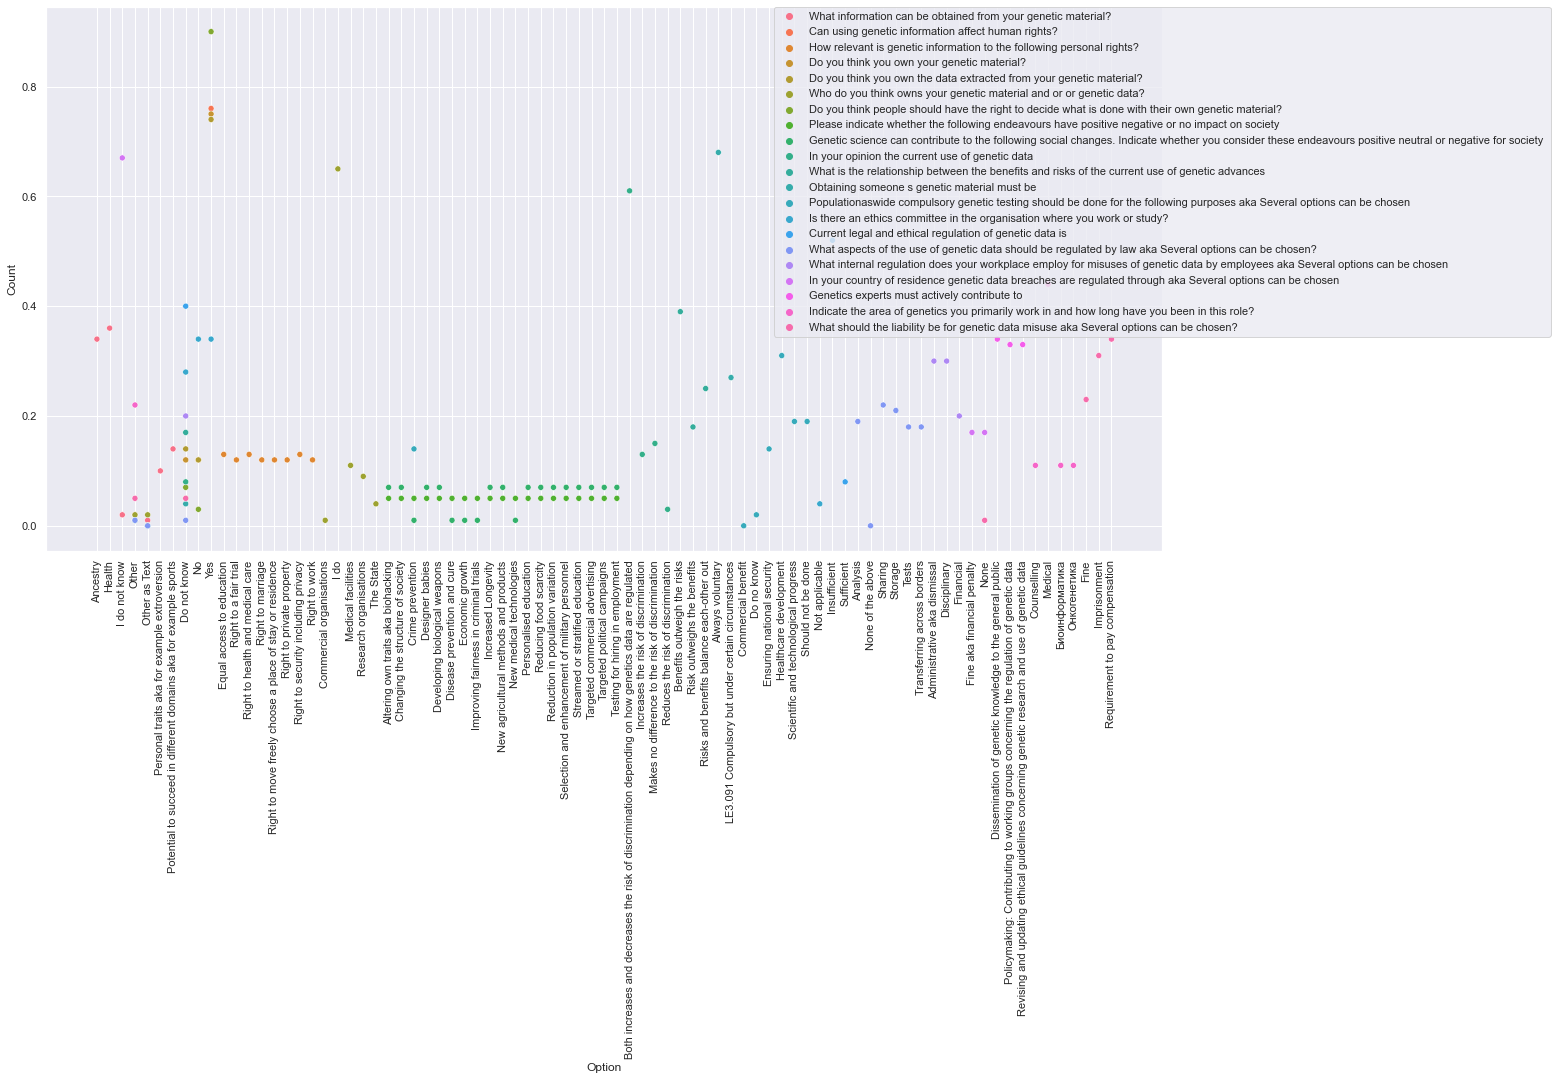

In [178]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

g = sns.scatterplot(data=snx, x=snx.Option, y='Count', hue='Description')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 1), loc='upper center', borderaxespad=0.)

plt.xticks(rotation=90)

In [179]:
grx = t_gr

del grx['Description']
del grx['Group']

In [180]:
ngrx = grx/len(grx)

In [181]:
ngrx # dropped proportions less than 1 %
ngrx.drop([col for col, val in ngrx.sum().iteritems() if val < 1], axis=1, inplace=True)


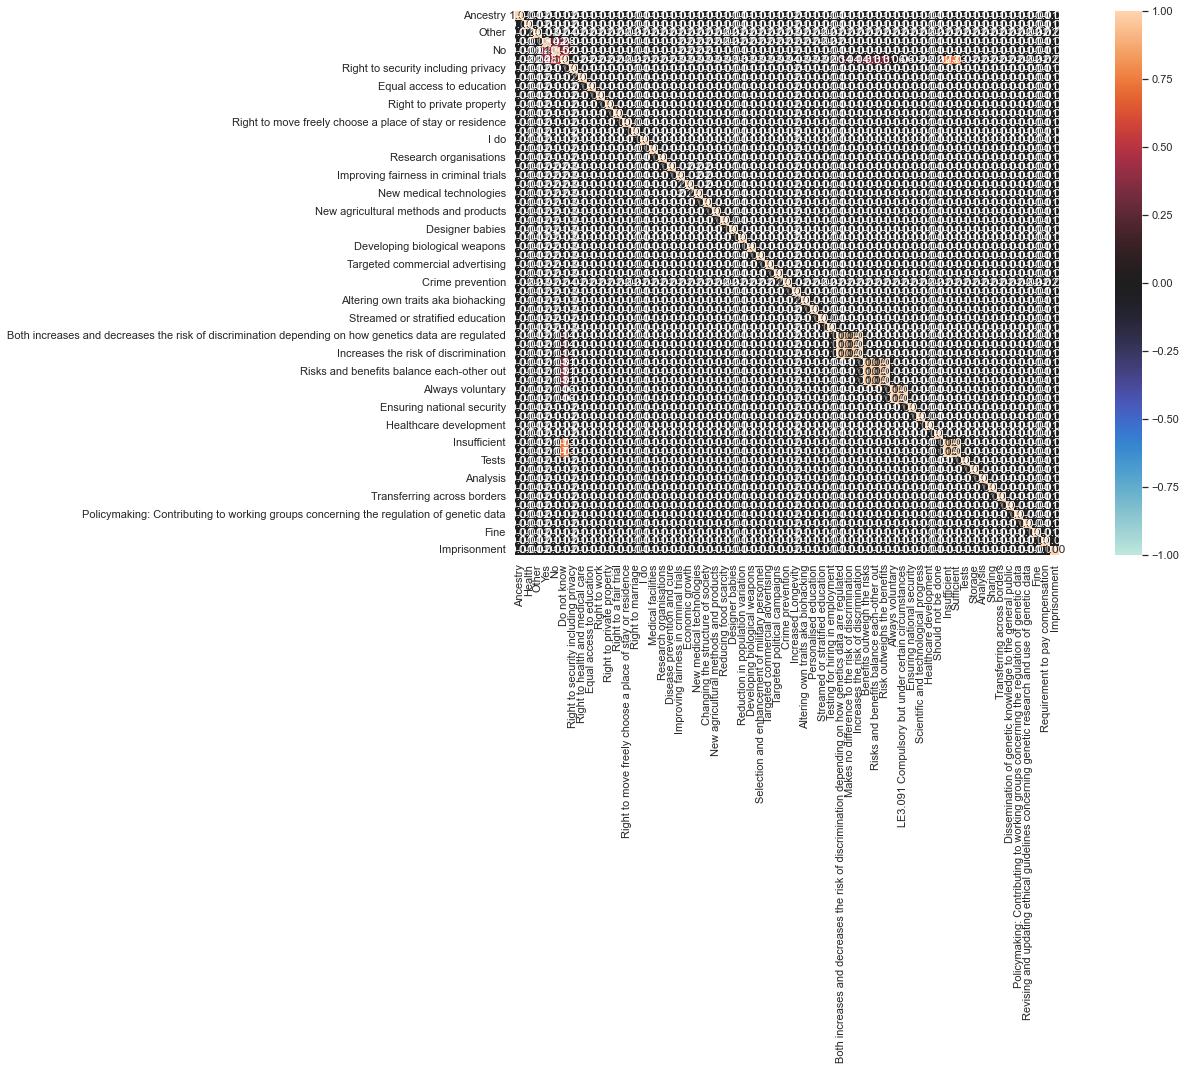

{'corr':                                                     Ancestry    Health  \
 Ancestry                                            1.000000 -0.009174   
 Health                                             -0.009174  1.000000   
 Other                                              -0.016670 -0.016670   
 Yes                                                -0.014611 -0.014611   
 No                                                 -0.011622 -0.011622   
 ...                                                      ...       ...   
 Policymaking: Contributing to working groups co... -0.009174 -0.009174   
 Revising and updating ethical guidelines concer... -0.009174 -0.009174   
 Fine                                               -0.009174 -0.009174   
 Requirement to pay compensation                    -0.009174 -0.009174   
 Imprisonment                                       -0.009174 -0.009174   
 
                                                        Other       Yes  \
 Ancestry      

In [182]:
associations(ngrx, nom_nom_assoc = 'theil' ,nan_strategy='replace')

## network analysis

In [193]:
cdf = large_df
cdf['Option'] = cdf['Option'].str.replace('Other as Text', '')
cdf['Option'] = cdf['Option'].str.replace('Other', '')
cdf

,id,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite,subs
0,29,RU,1,Medical,LE2.066,Indicate the area of genetics you primarily wo...,Medical,20,Yes,1
1,45,RU,1,Other,LE2.066,Indicate the area of genetics you primarily wo...,,20,Yes,2
2,64,RU,1,Medical,LE2.066,Indicate the area of genetics you primarily wo...,Medical,20,Yes,1
3,566,RU,2,Other,LE2.066,Indicate the area of genetics you primarily wo...,,20,Yes,2
4,585,EN,2,Counselling,LE2.066,Indicate the area of genetics you primarily wo...,Counselling,20,Yes,3
...,...,...,...,...,...,...,...,...,...,...
47376,1901,ES-ES,8,4,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,81
47377,1903,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,81
47378,1905,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,81
47379,1906,ES-ES,8,5,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,81


In [194]:

cdf = cdf.groupby(["id", "Group", "Description"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()


In [196]:
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series


cdf['rating'] = nx.iloc[:,2]

In [197]:
del cdf['Option']
cdf

,id,Group,Description,rating
0,0,1,What information can be obtained from your gen...,"'Ancestry','Health'"
1,0,2,Can using genetic information affect human rig...,'Yes'
2,0,3,How relevant is genetic information to the fol...,"'Right to security including privacy','Right t..."
3,0,4,Do you think you own your genetic material?,'Yes'
4,0,5,Do you think you own the data extracted from y...,'Yes'
...,...,...,...,...
17108,1912,7,Do you think people should have the right to d...,'Yes'
17109,1915,6,Who do you think owns your genetic material an...,'I do'
17110,1915,7,Do you think people should have the right to d...,'Yes'
17111,1916,6,Who do you think owns your genetic material an...,'I do'


In [198]:
# network visualization

from itertools import combinations
import networkx as nx
import nxviz as nv


In [199]:
# return a list of ratings

split_rating = lambda rank : [[str(y.strip()) for y in x.split('''","''')] for x in rank]


In [201]:
selections = split_rating(cdf['rating'])

In [202]:
new_list = [item[0].split(",") for item in selections]

In [203]:
new_list

[["'Ancestry'", "'Health'"],
 ["'Yes'"],
 ["'Right to security including privacy'",
  "'Right to health and medical care'",
  "'Equal access to education'",
  "'Right to work'",
  "'Right to private property'",
  "'Right to a fair trial'",
  "'Right to move freely choose a place of stay or residence'",
  "'Right to marriage'"],
 ["'Yes'"],
 ["'Yes'"],
 ["'Do not know'"],
 ["'Disease prevention and cure'",
  "'Improving fairness in criminal trials'",
  "'Economic growth'",
  "'New medical technologies'",
  "'Reducing food scarcity'",
  "'Designer babies'",
  "'Developing biological weapons'",
  "'Selection and enhancement of military personnel'",
  "'Targeted political campaigns'",
  "'Crime prevention'",
  "'Altering own traits aka biohacking'",
  "'Personalised education'"],
 ["'Disease prevention and cure'",
  "'Improving fairness in criminal trials'",
  "'Economic growth'",
  "'New medical technologies'",
  "'Changing the structure of society'"],
 ["'Both increases and decreases the

In [204]:
# flatten list function

def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [205]:
# Extract rating connections
rating_connections = list(
    map(lambda x: list(combinations(x[::-1], 2)), new_list)
)

In [206]:
flat_connections = flatten_list(rating_connections)


In [207]:
df_graph = pd.DataFrame.from_records(flat_connections, columns=["From", "To"])


In [208]:
df_graph = df_graph.groupby(["From", "To"]).size().reset_index()
df_graph.columns = ["From", "To", "Count"]
G = nx.from_pandas_edgelist(
    df_graph, source="From", target="To", edge_attr="Count"
)


In [209]:
#Let's opt for a spring layout
spring_pos = nx.spring_layout(G, seed=2) 

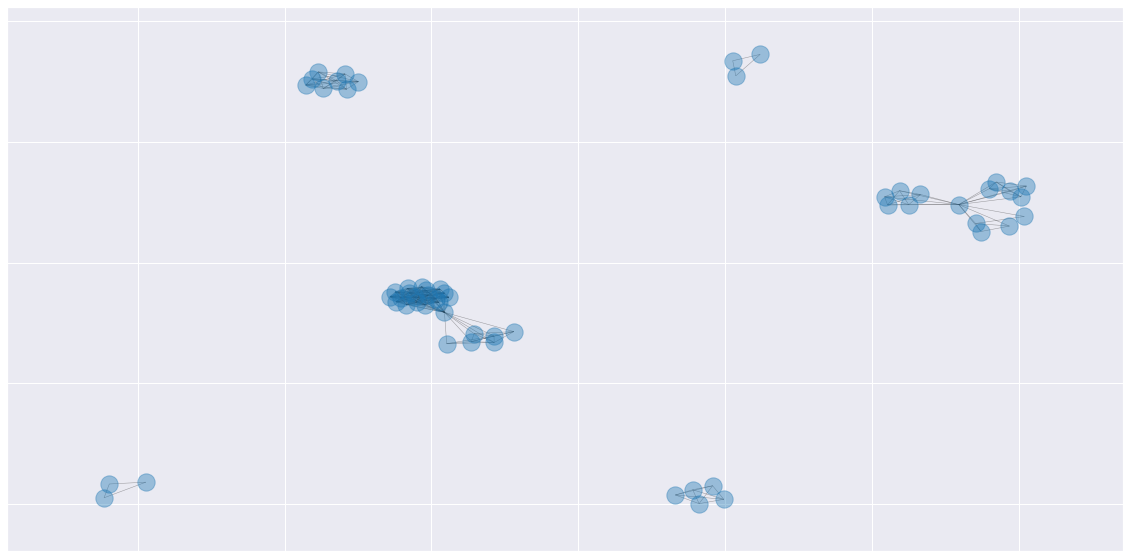

In [210]:
#draw the network
nx.draw_networkx_nodes(G, spring_pos, alpha=0.4)
nx.draw_networkx_edges(G, spring_pos,width = 0.5, alpha=0.4)


In [211]:
from pyvis.network import Network

In [212]:
net = Network(notebook=True)

In [213]:
net.from_nx(G)

In [214]:
net.show('example.html')

In [215]:
# dynamic node sizes

scale=1 # Scaling the size of the nodes by 10*degree
d = dict(G.degree)

#Updating dict
d.update((x, scale*y) for x, y in d.items())

#Setting up size attribute
nx.set_node_attributes(G,d,'size')

G2 = Network(height="1500px", width="75%",bgcolor="#222222",font_color="white",directed=False)
G2.from_nx(G)
G2.show("network_map.html")

EON